In [2]:
import matplotlib.pyplot as plt
import numpy as np
import lasio

In [86]:
def plot_curve(ax, df, curve, lb=None, ub=None, color='k', pad=0, s=2, mult=1,
            units:str=None, mask=None, offset:int=0, title:str=None, label:str=None,
            semilog:bool=False, bar:bool=False, fill:bool=None, rightfill:bool=False,
            marker=None, edgecolor=None, ls=None, alpha=None):
        if mask is None:
            x, y = -offset+mult*df[curve], df.index
        else:
            x, y = -offset+mult*df[curve][mask], df.index[mask]
        lb = x[~np.isnan(x)].min() if lb is None else lb
        ub = x[~np.isnan(x)].max() if ub is None else ub
        if semilog:
            ax.semilogx(x, y, c=color, label=curve, alpha=alpha,
                        marker=marker, markersize=s, markeredgecolor=edgecolor, linestyle=ls, linewidth=s)
        else:
            if bar:
                ax.barh(y, x, color=color, label=curve, alpha=alpha)
            else:
                ax.plot(x, y, c=color, label=curve, alpha=alpha,
                        marker=marker, markersize=s, markeredgecolor=edgecolor, linewidth=s, linestyle=ls)
        if fill:
            if rightfill:
                ax.fill_betweenx(y, x, ub, alpha=alpha, color=color)
            else:
                ax.fill_betweenx(y, lb, x, alpha=alpha, color=color)
        if units is None:
            if hasattr(df, 'curvesdict'):
                units = df.curvesdict[curve].unit
            else:
                units = ''
        ax.set_xlim(lb, ub)
        ax.grid(True, which='both')
        ax.set_title(title, weight='bold') if title != None else None
        xlab = label if label is not None else curve
        if offset != 0:
            ax.set_xlabel('{} [{}] with {} offset'.format(xlab, units, offset), color=color, weight='bold')
        else:
            ax.set_xlabel('{} [{}]'.format(xlab, units), color=color, weight='bold')
        ax.xaxis.set_label_position('top'); ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_tick_params(color=color, width=s)
        ax.spines['top'].set_position(('axes', 1+pad/100))
        ax.spines['top'].set_edgecolor(color); ax.spines['top'].set_linewidth(2)
        if ls is not None:
            ax.spines['top'].set_linestyle(ls)
        return None

In [15]:
well1 = lasio.read('42283321889000.las'); w1 = well1.df()
well2 = lasio.read('42283321990000.las'); w2 = well2.df()
well3 = lasio.read('42283330269000.las'); w3 = well3.df()

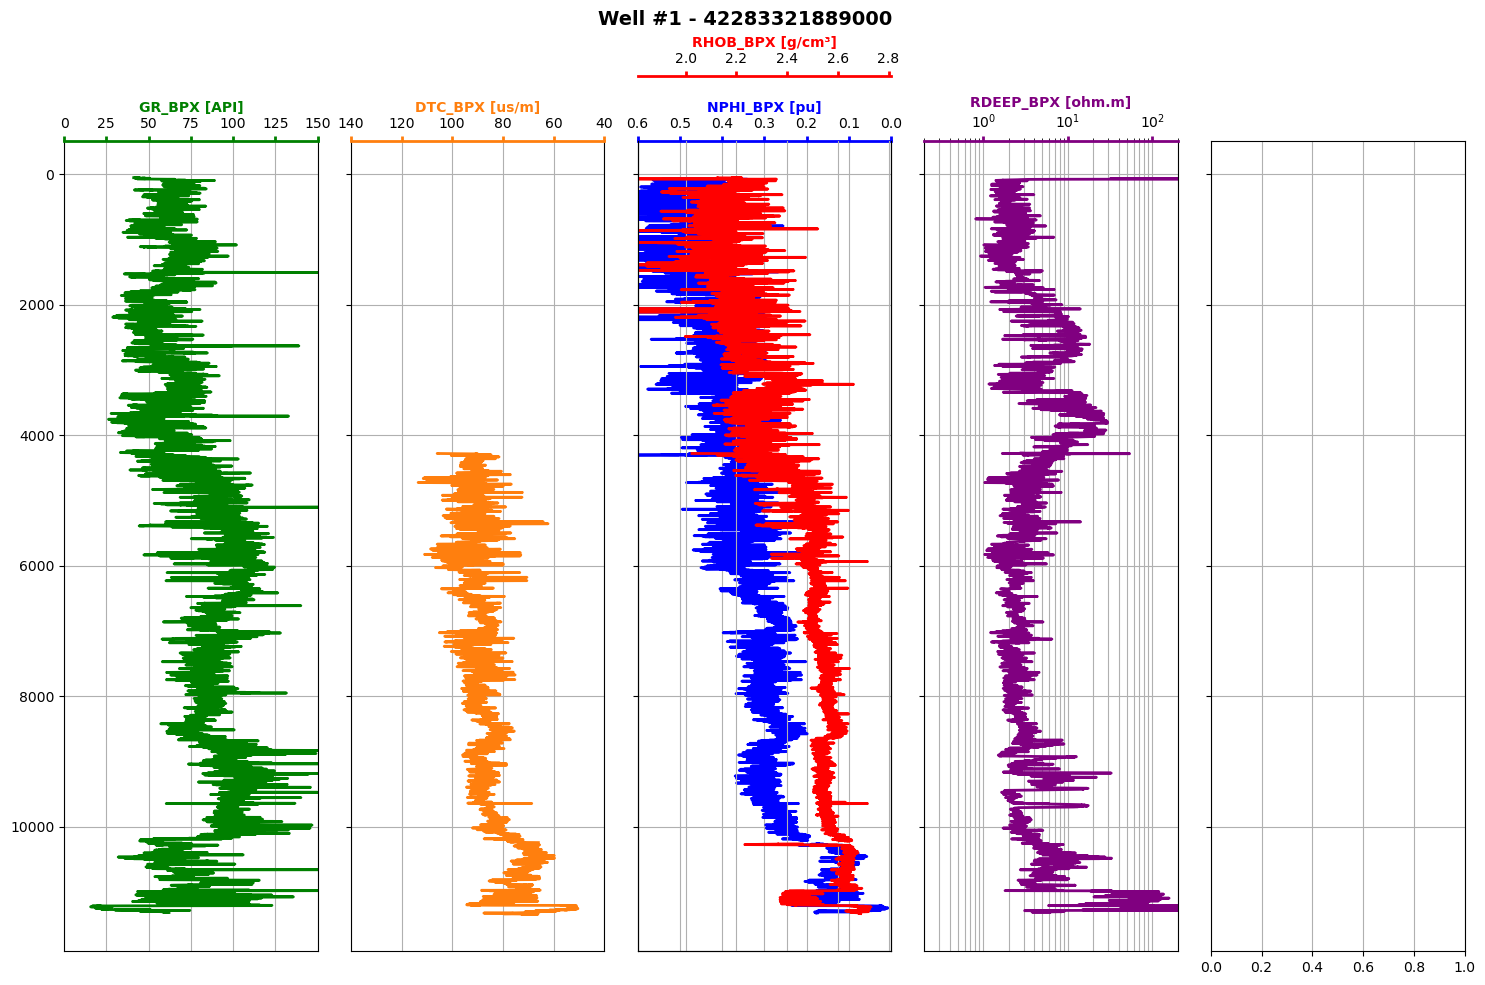

In [112]:
fig, axs = plt.subplots(1, 5, figsize=(15, 10), sharey=True)
ax1, ax2, ax3, ax4, ax5 = axs
ax31 = ax3.twiny()

plot_curve(ax1, w1, 'GR_BPX', lb=0, ub=150, color='g', units='API')
plot_curve(ax2, w1, 'DTC_BPX', lb=140, ub=40, color='tab:orange', units='us/m')
plot_curve(ax3, w1, 'NPHI_BPX', lb=0.6, ub=0.0, color='b', units='pu')
plot_curve(ax31, w1, 'RHOB_BPX', lb=1.81, ub=2.81, color='r', units='g/cm³', pad=8)
plot_curve(ax4, w1, 'RDEEP_BPX', lb=0.2, ub=200, color='purple', units='ohm.m', semilog=True)

ax1.invert_yaxis()
fig.suptitle('Well #1 - 42283321889000', fontsize=14, weight='bold')
[a.grid(True, which='both') for a in axs]
plt.tight_layout()
plt.show()

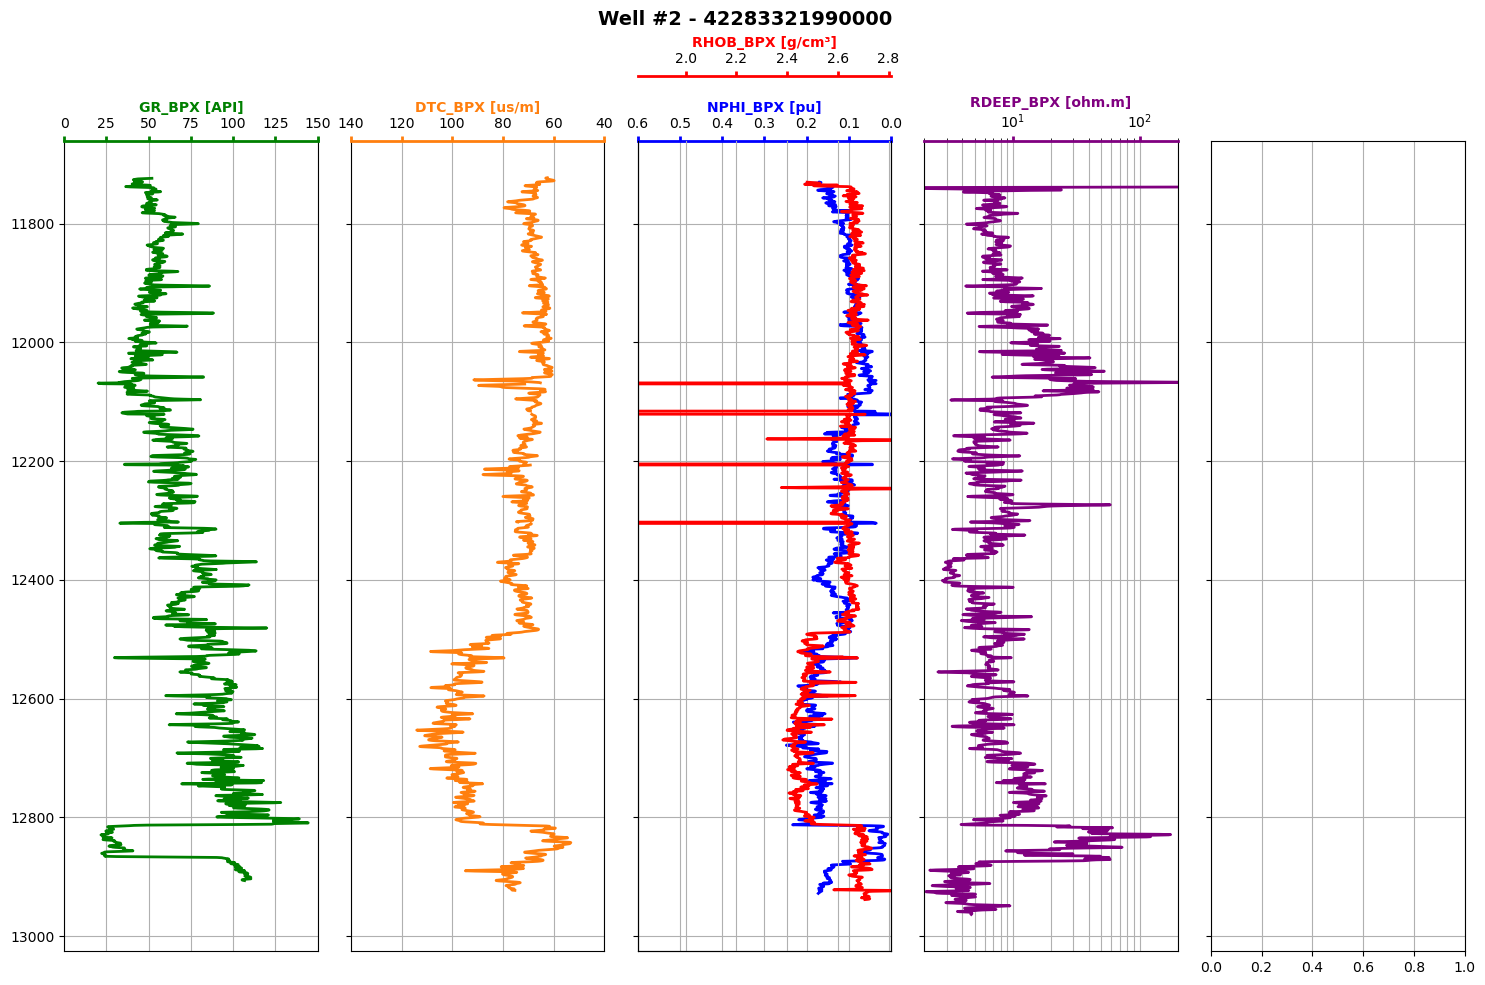

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 10), sharey=True)
ax1, ax2, ax3, ax4, ax5 = axs
ax31 = ax3.twiny()

plot_curve(ax1, w2, 'GR_BPX', lb=0, ub=150, color='g', units='API')
plot_curve(ax2, w2, 'DTC_BPX', lb=140, ub=40, color='tab:orange', units='us/m')
plot_curve(ax3, w2, 'NPHI_BPX', lb=0.6, ub=0.0, color='b', units='pu')
plot_curve(ax31, w2, 'RHOB_BPX', lb=1.81, ub=2.81, color='r', units='g/cm³', pad=8)
plot_curve(ax4, w2, 'RDEEP_BPX', lb=2, ub=200, color='purple', units='ohm.m', semilog=True)

ax1.invert_yaxis()
fig.suptitle('Well #2 - 42283321990000', fontsize=14, weight='bold')
[a.grid(True, which='both') for a in axs]
plt.tight_layout()
plt.show()

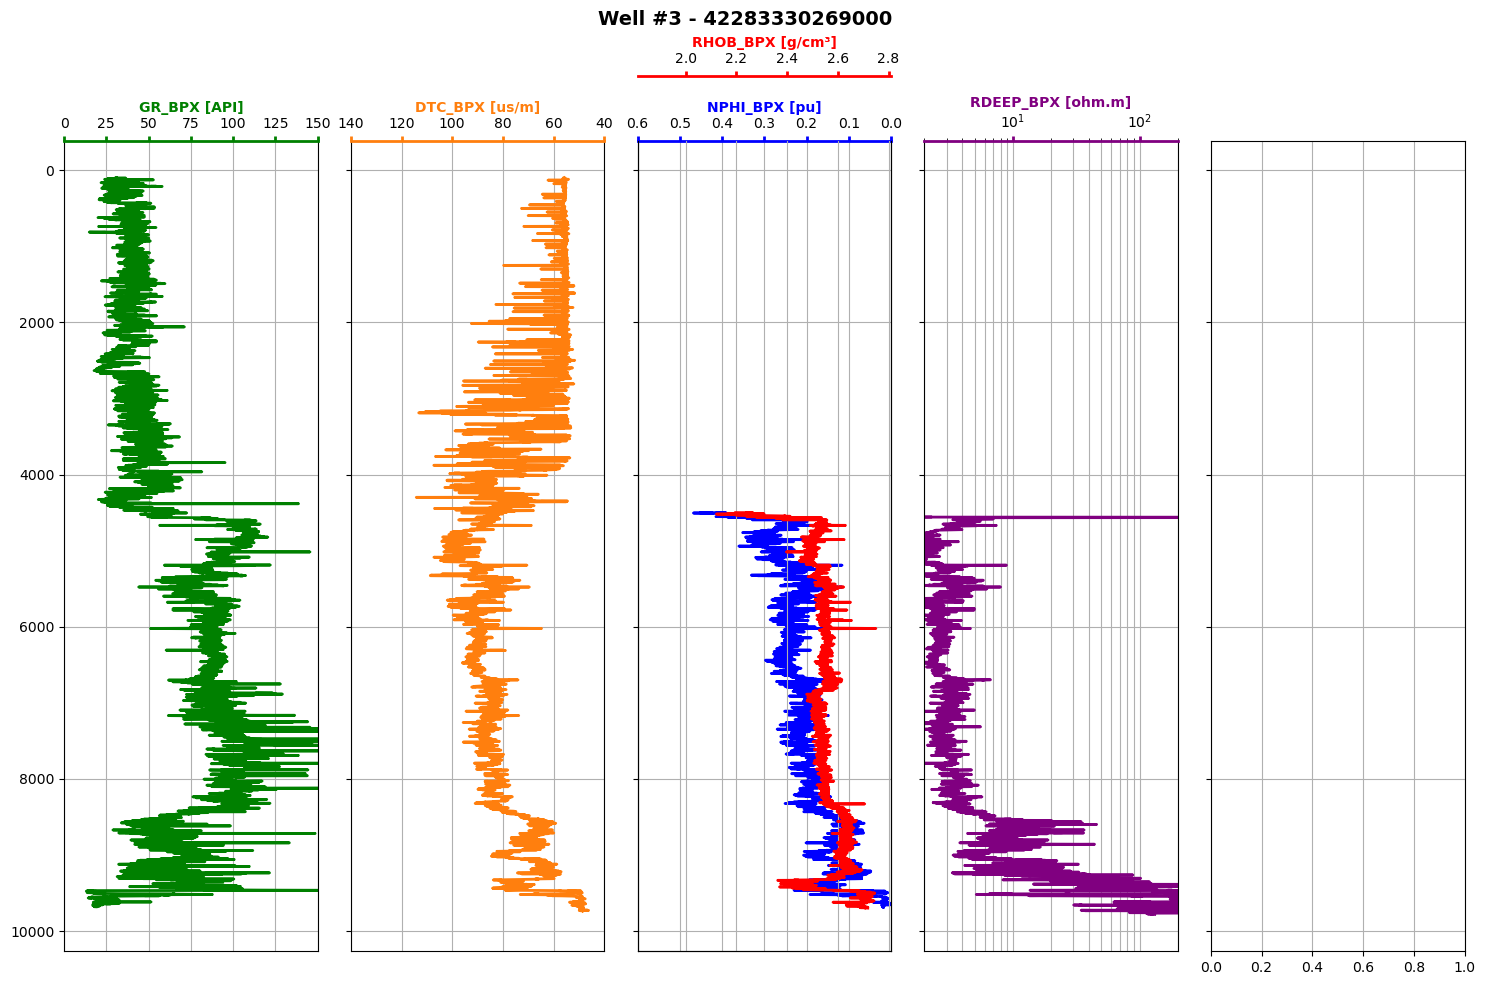

In [118]:
fig, axs = plt.subplots(1, 5, figsize=(15, 10), sharey=True)
ax1, ax2, ax3, ax4, ax5 = axs
ax31 = ax3.twiny()

plot_curve(ax1, w3, 'GR_BPX', lb=0, ub=150, color='g', units='API')
plot_curve(ax2, w3, 'DTC_BPX', lb=140, ub=40, color='tab:orange', units='us/m')
plot_curve(ax3, w3, 'NPHI_BPX', lb=0.6, ub=0.0, color='b', units='pu')
plot_curve(ax31, w3, 'RHOB_BPX', lb=1.81, ub=2.81, color='r', units='g/cm³', pad=8)
plot_curve(ax4, w3, 'RDEEP_BPX', lb=2, ub=200, color='purple', units='ohm.m', semilog=True)

ax1.invert_yaxis()
fig.suptitle('Well #3 - 42283330269000', fontsize=14, weight='bold')
[a.grid(True, which='both') for a in axs]
plt.tight_layout()
plt.show()

***
# END